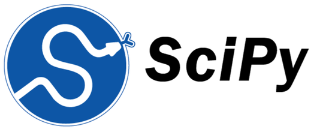

SciPy — это набор математических алгоритмов и полезных функций, созданных на основе библиотеки NumPy. SciPy значительно расширяет возможности Python, предоставляя пользователю высокоуровневые команды и классы для манипулирования и визуализации данных.

В рамках лекции ознанкомимся с возможностями данной библиотеки.

SciPy организован в подпакеты, охватывающие различные области научных вычислений.  
Подпакеты представлены в следующей таблице:

| **Название** | **Описание**                                              |
|--------------|-----------------------------------------------------------|
| cluster      | Алгоритмы кластерного анализа                             |
| constants    | Физические и математические константы                     |
| fft          | Быстрое преобразование Фурье                              |
| integrate    | Решения интегральных и обычных дифференциальных уравнений |
| interpolate  | Интерполяция и сглаживание сплайнов                       |
| io           | Ввод и вывод                                              |
| linalg       | Линейная алгебра                                          |
| ndimage      | N-размерная обработка изображений                         |
| odr          | Метод ортогональных расстояний                            |
| optimize     | Оптимизация и численное решение уравнений                 |
| signal       | Обработка сигналов                                        |
| sparse       | Разреженные матрицы                                       |
| spatial      | Разреженные структуры данных и алгоритмы                  |
| special      | Специальные функции                                       |
| stats        | Статистические распределения и функции                    |


Установка pip:
```
pip install scipy
или
python -m pip install scipy
```

Установка conda:  
```
conda install scipy
или
conda install conda-forge::scipy
```

Что бы запустить установку в Jupyter Notebook в ячейке типа Код перед командой ставим !:  
```
!pip install scipy
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from scipy import integrate

API reference: https://docs.scipy.org/doc/scipy/reference/index.html

Функция `help()` выводит документацию, созданную для определенного токена языка Python. Под токеном подразумеваются ключевые слова, название классов, модулей Python, функций и так далее.



In [ ]:
help(integrate.quad) # информация о функции, которое вычисляет определенный интеграл

## Константы (scipy.constants)

Содержит математические и физические константы  
https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants

In [ ]:
from scipy import constants

print("Математическе константы:")
print(f"pi = {constants.pi}")
print(f"Golden ratio = {constants.golden_ratio}")

print("Физические константы:")
print(f"Скорость света в вакууме (c) = {constants.c}")
print(f"Постоянная Планка (h) = {constants.h}")

Математическе константы:
pi = 3.141592653589793
Golden ratio = 1.618033988749895
Физические константы:
Скорость света в вакууме (c) = 299792458.0
Постоянная Планка (h) = 6.62607015e-34


In [ ]:
# Словарь физических констант формата physical_constants[name] = (value, unit, uncertainty)
constants.physical_constants['alpha particle mass']

(6.6446573357e-27, 'kg', 2e-36)

In [ ]:
constants.find('alpha')

['alpha particle mass',
 'alpha particle mass energy equivalent',
 'alpha particle mass energy equivalent in MeV',
 'alpha particle mass in u',
 'alpha particle molar mass',
 'alpha particle relative atomic mass',
 'alpha particle-electron mass ratio',
 'alpha particle-proton mass ratio',
 'electron to alpha particle mass ratio']

## Алгоритмы кластерного анализа (scipy.cluster)

**Кластеризация** — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

Модуль **vq** - k-means кластеризация  
Модуль **hierarchy** - иерархическая кластеризация

In [ ]:
# Импортируем функцию k-means
from scipy.cluster.vq import kmeans, vq, whiten

# Импортируем вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
# Создаем тестовый датасет с использованием make_blobs
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
dataset = make_blobs(n_samples=100,
                     centers=4,
                     n_features=2,
                     cluster_std=1,
                     random_state=50)

# нормализуем признаки
X = whiten(dataset[0])
y = dataset[1]

print(X[:5], y[:5])

[[ 0.01655515 -0.85310412]
 [-0.00628817 -0.81349952]
 [-0.2041461  -0.61710994]
 [-1.64018046  1.02361617]
 [-2.7553745  -0.76890956]] [0 0 0 3 1]


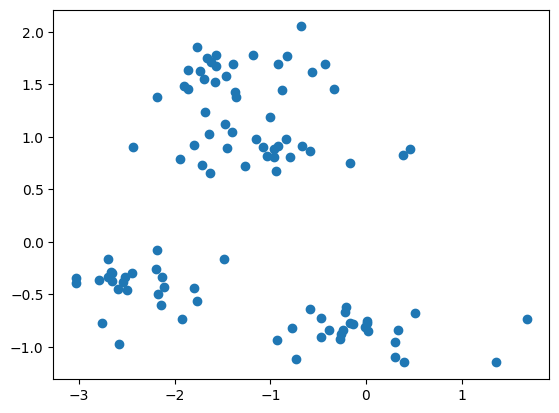

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
# Вычисляем k-means с 4 кластерами
centroids, _ = kmeans(X, k_or_guess=4)
centroids

array([[-1.66384297,  1.35766939],
       [-2.40232382, -0.4130371 ],
       [-0.03632706, -0.8511336 ],
       [-0.7016527 ,  1.11581679]])

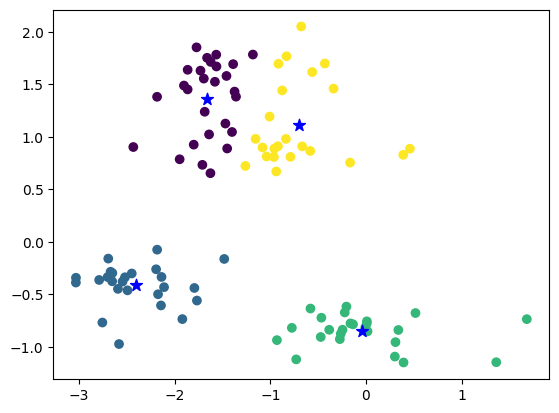

In [ ]:
# разделим значения по пренадлежности к кластеру
cluster_num = vq(X, centroids)[0]

# Сгенерированные значения
plt.scatter(X[:, 0],
            X[:, 1],
            c=cluster_num)

# Центроиды
plt.scatter(centroids[:, 0],
            centroids[:, 1],
            marker='*',
            s=80,
            color='blue')

## Линейная алгебра (scipy.linalg)

Линейная алгебра — раздел алгебры, изучающий математические объекты линейной природы: векторные (или линейные) пространства, линейные отображения, системы линейных уравнений.  
https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg

Системы линейных уравнений могут быть представлены в матричной форме $AX=B$, где $A$ — это матрица коэффициентов системы линейных уравнений, $X$ — вектор-столбец неизвестных, а $B$ — вектор-столбец свободных членов.

\begin{cases}
 x_1+x_2+x_3+x_4=0 \\
 5x_1-3x_2+2x_3-8x_4=1 \\
 3x_1+5x_2+x_3+4x_4=0 \\
 4x_1+2x_2+3x_3+x_4=3 \\
\end{cases}  
<br/>
<center>$ M=\begin{bmatrix}
 1 & 1 & 1 & 1 \\
 5 & -3 & 2 & -8 \\
 3 & 5 & 1 & 4 \\
 4 & 2 & 3 & 1 \\
\end{bmatrix}$,  $ B=\begin{bmatrix}
 0 \\
 1 \\
 0 \\
 3 \\
\end{bmatrix}$, $ X=\begin{bmatrix}
 x_1 \\
 x_2 \\
 x_3 \\
 x_4 \\
\end{bmatrix}$</center>

In [ ]:
from scipy import linalg

# записываем коэффиценты левой части
A = np.array([
    [1, 1, 1, 1],
    [5, -3, 2, -8],
    [3, 5, 1, 4],
    [4, 2, 3, 1]
])

# записываем ответы из правой части
B = np.array([0,
              1,
              0,
              3])

result = linalg.solve(A, B)
print(result)

[ 7. -8. -5.  6.]


In [ ]:
np.round(np.dot(A, result), 5) == B

array([ True,  True,  True,  True])

Теперь попробуем вычислить **определитель матрицы** с помощью `det()`: $ M=\begin{bmatrix}
 -4 & -1 & 2 \\
 10 & 4 & -1 \\
 8 & 3 & 1 \\
\end{bmatrix}$

In [ ]:
A = np.array([
    [-4, -1, 2],
    [10, 4, -1],
    [ 8, 3, 1]
])

result = linalg.det(A)
print(result)

-14.0


Функция `inv()` позволяет найти обратную матрицу:

In [ ]:
A = np.array([
    [1., 2.],
    [3., 4.]
])

print('Первоначальная матрица A:')
print(A)

B = linalg.inv(A)

print('\nОбратная А матрица:')
print(B)

Первоначальная матрица A:
[[1. 2.]
 [3. 4.]]

Обратная А матрица:
[[-2.   1. ]
 [ 1.5 -0.5]]


Обратная матрица — такая матрица $A^{-1}$, при умножении которой на исходную матрицу $A$ получается единичная матрица $E$

In [ ]:
np.round(np.dot(A, B), 5)

array([[1., 0.],
       [0., 1.]])

`lu()` вычисляет LU-разложение матрицы.  
**$LU$-разложение** — представление матрицы $A$ в виде произведения двух матриц, $A=LU$, где $L$ — нижняя треугольная матрица, а $U$ — верхняя треугольная матрица.

In [ ]:
from scipy.linalg import lu

A = np.array([
    [2, 5, 8, 7],
    [5, 2, 2, 8],
    [7, 5, 6, 6],
    [5, 4, 4, 8]
])

p, l, u = lu(A)

print(p, l, u, sep='\n\n')

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

[[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.12        1.          0.        ]
 [ 0.71428571 -0.44       -0.46153846  1.        ]]

[[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  6.28571429  5.28571429]
 [ 0.          0.         -1.04        3.08      ]
 [ 0.          0.          0.          7.46153846]]


## Интегральные функции (scipy.integrate)

Численное интегрирование (методы трапеции, Симпсона, Ромберга и др.), решение обыкновенных дифференциальных уравнений (ОДУ).  
https://docs.scipy.org/doc/scipy/reference/integrate.html  

В модуле **scipy.integrate** есть несколько функций для вычисления определённых интегралов. Наиболее простой является функция **quad()**, которая вычисляет обычный интеграл от одной переменной и имеет следующий синтаксис:  
```quad (func, a, b, …)```, где:
* func — имя подынтегральной функции
* a — нижний предел интегрирования
* b — верхний предел интегрирования

Для примера посчитаем интеграл из документации:
$$\int_{0}^{4}{x}^{2}dx$$

In [ ]:
from scipy import integrate

x2 = lambda x: x**2

integrate.quad(x2, 0, 4)

(21.333333333333336, 2.368475785867001e-13)

Функция `quad()` возвращает кортеж из двух элементов, первый — значение интеграла, второй — точность вычисления. В данном случае  получен с точностью до 13-го знака после запятой.

Также есть функции `dblquad()` и `tplquad()` для вычисления двойных и тройных определеных интегралов соответственно.

$$\int_{x=1}^{x=2}\int_{y=2}^{y=3}\int_{z=0}^{y=1}xyzdzdydx$$

In [ ]:
f = lambda z, y, x: x*y*z

integrate.tplquad(f, 1, 2, 2, 3, 0, 1)

(1.8750000000000002, 3.324644794257407e-14)

Интегрирование функций, заданных фиксированными выборками   
`trapezoid()` - метод трапеций,   
`simpson()` - метод Симпсона,  
`romb()` - метод Ромберга и т.д.

In [ ]:
# Зада
x = np.arange(0, 5)
y = np.power(x, 2)

integrate.simpson(y, x=x)

21.333333333333332

Также **scipy.integrate** позволяет решать простве обыкновенные дифференциальные уравнение и системы ОДУ


## Интерполяция (scipy.interpolate)

Интерполяция — нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений.  
https://docs.scipy.org/doc/scipy/reference/interpolate.html

**scipy.interpolate** содержит набор функций для интерполяции одномерных и многомерных данных, сплайн функции и классы, полиномиальные интерполяторы.   
Интерполяции одномерного набора данных возможна с помощью функции `interp1d()`.  
Синтаксис: `fi = interp1d(x, f0, 'kind', …)`.  
Функция `interp1d()` принимает в качестве первых двух аргументов одномерные массивы координат x и соответствующих значений некоторой величины f0.

Реализовано несколько способов интерполяции:
- линейная ('kind'='linear');
- квадратичная('kind'='qudratic');
- кубическая ('kind'='cubic') и т.д.  

По умолчанию, когда параметр 'kind' не указан, используется линейная интерполяция.

In [ ]:
from scipy import interpolate

x = np.arange(0, 10)
y = np.exp(-x/3.0)

print(x)
print(y)

f = interpolate.interp1d(x, y)

[0 1 2 3 4 5 6 7 8 9]
[1.         0.71653131 0.51341712 0.36787944 0.26359714 0.1888756
 0.13533528 0.09697197 0.06948345 0.04978707]


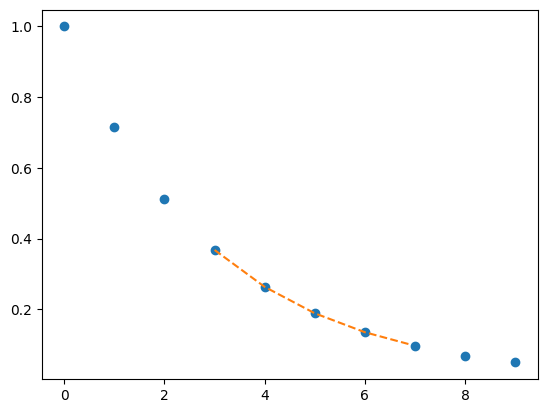

In [ ]:
xnew = np.arange(3, 7, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.plot(x, y, 'o', xnew, ynew, '--')
plt.show()

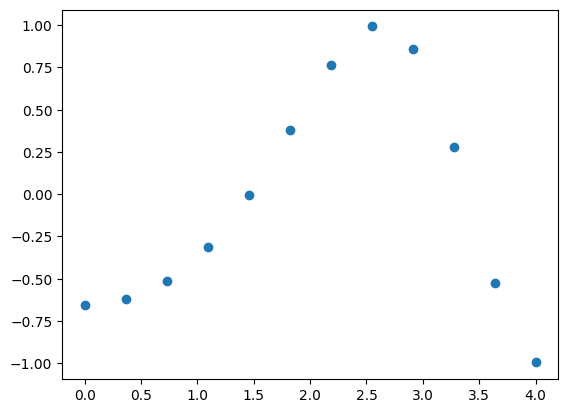

In [ ]:
# Еще 1 пример для сравнения линейной и кубической интерполяции
x = np.linspace(0, 4, 12)
y = np.cos(x**2 / 3 + 4)

plt.plot(x, y, "o")
plt.show()

In [ ]:
f1 = interpolate.interp1d(x, y, kind = 'linear')
f2 = interpolate.interp1d(x, y, kind = 'cubic')

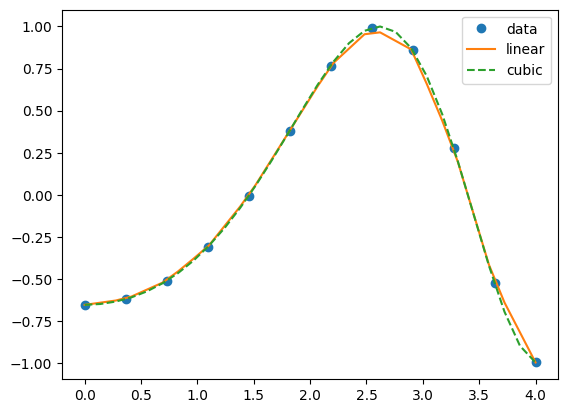

In [ ]:
xnew = np.linspace(0, 4, 30)

plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'])
plt.show()

In [ ]:
# Интерполяция для заполнения отсутсвующих значений в пандас
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})

df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [ ]:
df.interpolate(method ='linear', limit_direction ='forward')

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,3.0,8.0,6.0


## Функции многомерной обработки изображений (scipy.ndimage)

SciPy предоставляет множество функций для обработки многомерных изображений, включая функции для чтения и записи изображений, для основных манипуляций (кадрирование, переворачивание, вращение), фильтрации изображений (устранение шумов, резкость), сегментации изображений (маркировка пикселей, соответствующих различным объектам классификация), интерполяции изображений, операций математической морфологии и т.д.  
https://docs.scipy.org/doc/scipy/reference/ndimage.html   
https://www.geeksforgeeks.org/multidimensional-image-processing-using-scipy-in-python/

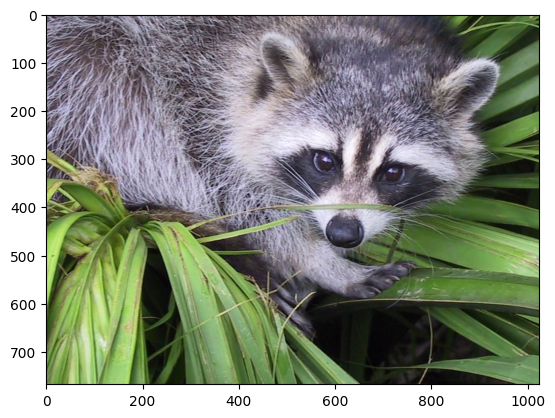

In [ ]:
from scipy import datasets
face = datasets.face()

plt.imshow(face)
plt.show()

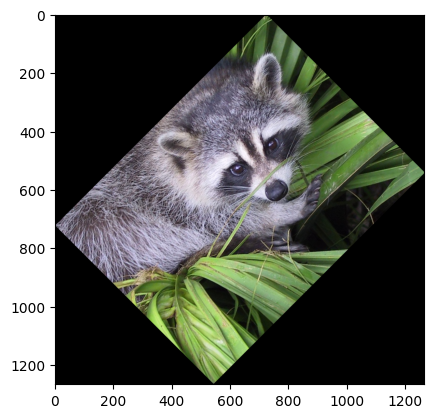

In [ ]:
from scipy import ndimage
rotate_face = ndimage.rotate(face, 45)

plt.imshow(rotate_face)
plt.show()

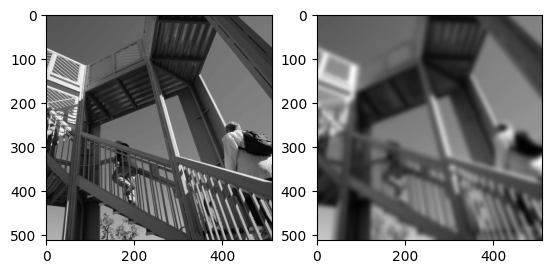

In [ ]:
from scipy.ndimage import gaussian_filter

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

ascent = datasets.ascent()
# sigma стандартное отклонение для Гауссовского фильтра
result = gaussian_filter(ascent, sigma=5)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

## Графовые алгоритмы (scipy.sparse.csgraph)

Подпакет **scipy.sparse.csgraph** предоставлет широкий спектр функций и алгоритмов для эффективного анализа графов, основанных на разреженных матрицах.  
https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html#module-scipy.sparse.csgraph

- Алгоритмы нахлждения кртачайшего пути
- Поиск связных компонент
- Поиск минимального остовного дерева
и т.д.

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree, csgraph_from_dense, dijkstra

graph = csr_matrix([[0, 8, 0, 3],
                    [0, 0, 2, 5],
                    [0, 0, 0, 6],
                    [0, 0, 0, 0]])

print(graph.toarray(), '\n')
graph = csgraph_from_dense(graph.toarray())
print(graph)

[[0 8 0 3]
 [0 0 2 5]
 [0 0 0 6]
 [0 0 0 0]] 

  (0, 1)	8.0
  (0, 3)	3.0
  (1, 2)	2.0
  (1, 3)	5.0
  (2, 3)	6.0


In [ ]:
# Применение алгоритма Дейкстры
dist_matrix, predecessors = dijkstra(csgraph=graph, directed=False, indices=0, return_predecessors=True)
print(dist_matrix)
print(predecessors)

[0. 8. 9. 3.]
[-9999     0     3     0]


Минимальное остовное дерево в связном взвешенном графе — это остовное дерево этого графа, имеющее минимальный возможный вес, где под весом дерева понимается сумма весов входящих в него рёбер.

In [ ]:
# Поиск минимального остовного дерева
t_csr = minimum_spanning_tree(graph)

print(t_csr.toarray())
print(csgraph_from_dense(t_csr.toarray()))

[[0. 0. 0. 3.]
 [0. 0. 2. 5.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
  (0, 3)	3.0
  (1, 2)	2.0
  (1, 3)	5.0


Что есть еще:
- Оптимизация (scipy.optimize) - набор функций, которые реализуют популярные алгоритмы оптимизаци: максимизация, минимизация функции, подбор кривой, поиск корня и т.д.
- Функции быстрого преобразования Фурье (scipy.fft)
- Статистика (scipy.stats)
- Ввод и вывод (scipy.io) - предоставляет несколько функций, которые помогают управлять файлами в разных форматах, включая MATLAB, файлы IDL, Matrix Market, Fortran, WAV.